In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train_data = pd.read_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/train/train.csv")

In [4]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
test_data = pd.read_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/test/test.csv")

In [6]:
train_data.drop('dropoff_datetime',axis=1,inplace=True)

In [7]:
train = train_data.copy()

#### Basic Overview of data

In [27]:
# no null values at all
test_data.isnull().sum()

id                    0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
vendor_id_2           0
haversine_distance    0
dtype: int64

In [28]:
train.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,vendor_id_2,haversine_distance
count,1.438626e+06,1.438626e+06,1.438626e+06,1.438626e+06,1.438626e+06,1.438626e+06,1.438626e+06,1.438626e+06
mean,1.664791e+00,-7.397385e+01,4.075105e+01,-7.397364e+01,4.075167e+01,9.459923e+02,5.349173e-01,3.291742e+00
std,1.314864e+00,3.708862e-02,2.743729e-02,3.237528e-02,2.965616e-02,5.252159e+03,4.987795e-01,3.661157e+00
min,0.000000e+00,-7.402995e+01,4.063000e+01,-7.403000e+01,4.063000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,-7.399188e+01,4.073749e+01,-7.399129e+01,4.073628e+01,3.940000e+02,0.000000e+00,1.224506e+00
50%,1.000000e+00,-7.398177e+01,4.075412e+01,-7.397987e+01,4.075452e+01,6.560000e+02,1.000000e+00,2.067849e+00
75%,2.000000e+00,-7.396753e+01,4.076832e+01,-7.396352e+01,4.076953e+01,1.059000e+03,1.000000e+00,3.766183e+00
max,6.000000e+00,-7.377093e+01,4.085000e+01,-7.377000e+01,4.085000e+01,3.526282e+06,1.000000e+00,2.719163e+01


##### Effect of vendor_id

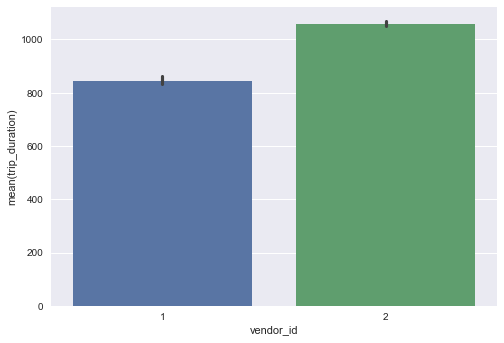

In [25]:
# average duration based on vendor
sns.barplot(train_data.vendor_id,train_data.trip_duration)

In [9]:
train.groupby(train.vendor_id)['trip_duration'].apply(np.mean)

vendor_id
1     845.438244
2    1058.643164
Name: trip_duration, dtype: float64

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [11]:
train = pd.get_dummies(train,columns=['vendor_id'] ,drop_first=True)

In [12]:
test_data = pd.get_dummies(test_data,columns=['vendor_id'] ,drop_first=True)

##### Working with extreme data points in different columns

In [13]:
train.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [15]:
train.loc[(train.passenger_count>6),:]


,id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,vendor_id_2
433304,id3280610,2016-06-07 10:06:24,7,-74.173668,40.737274,-74.173660,40.737297,N,19,1
436047,id2489742,2016-06-24 08:09:21,9,-73.710632,40.671581,-73.710632,40.671581,N,560,1
489613,id0506488,2016-05-08 22:39:08,7,-74.039482,40.715031,-74.039482,40.715019,N,15,1
824904,id0988237,2016-04-23 19:46:08,7,-73.631149,40.768551,-73.631149,40.768551,N,25,1
826064,id1488553,2016-01-01 01:15:20,8,-73.992653,40.768719,-74.041374,40.729954,N,104,1


In [16]:
train.passenger_count.replace([7,8,9],6,inplace=True)

In [17]:
test_data.passenger_count.replace([7,8,9],6,inplace=True)

In [43]:
train.loc[(train.trip_duration>90000),:].shape

(4, 11)

#### Taking longitudes and lattitudes of new york city into account

In [19]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
train = train[(train.pickup_longitude> xlim[0]) & (train.pickup_longitude < xlim[1])]
train = train[(train.dropoff_longitude> xlim[0]) & (train.dropoff_longitude < xlim[1])]
train = train[(train.pickup_latitude> ylim[0]) & (train.pickup_latitude < ylim[1])]
train = train[(train.dropoff_latitude> ylim[0]) & (train.dropoff_latitude < ylim[1])]

# Making Features

#### Calculting Haversine Distance between pick-up and drop off co-ordinates

In [20]:
from math import radians, cos, sin, asin, sqrt

def haversine_distance(row):
#     lon1, lat1, lon2, lat2):
    """
    Calculate the circle distance between two points in lat and lon
    on the earth (specified in decimal degrees)
    returning distance in miles
    """
    # need to convert decimal degrees to radians 
    # a unit of angle, equal to an angle at the center of a circle whose arc is equal in length to the radius.
    lon1, lat1, lon2, lat2 = row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
#applying to the dataset
train['haversine_distance'] = train.apply(haversine_distance, axis=1)

In [21]:
test_data['haversine_distance'] = test_data.apply(haversine_distance,axis=1)

#### Working on Pick up time stamp

In [52]:
train.pickup_datetime = pd.to_datetime(train.pickup_datetime)
test_data.pickup_datetime = pd.to_datetime(test_data.pickup_datetime)

In [54]:
train['pickup_hour'] = train.pickup_datetime.dt.hour
test_data['pickup_hour'] = test_data.pickup_datetime.dt.hour

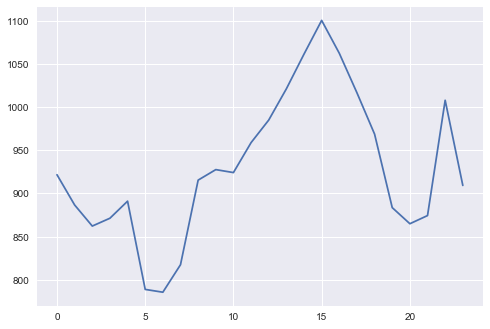

In [55]:
import plotly.plotly as py
plt.plot(train.trip_duration.groupby(train.pickup_hour).agg(np.mean))

In [ ]:
-]

In [56]:
train['pickup_day'] = train.pickup_datetime.dt.day
test_data['pickup_day'] = test_data.pickup_datetime.dt.day

# implementaation

In [22]:
input_data = train_haversine.drop(['id','pickup_datetime','store_and_fwd_flag'],axis=1)

NameError: name 'train_haversine' is not defined

In [ ]:
prediction_data = test_haversine.drop(['id','pickup_datetime','store_and_fwd_flag'],axis=1)

In [ ]:
train_x = input_data.drop('trip_duration',axis=1)

In [ ]:
train_y = input_data.loc[:,'trip_duration']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(normalize=False)

In [ ]:
lr.fit(train_x,train_y)

In [ ]:
prediction_lr = lr.predict(prediction_data)


# storing the submission

In [ ]:
#submission_dict_lr = {'id':test_data.id,'trip_duration':prediction_lr}

In [ ]:
#baseline_submission_lr = pd.DataFrame(data =submission_dict_lr,)


In [ ]:
#baseline_submission_lr.set_index('id',inplace = True)

In [ ]:
#baseline_submission_lr[baseline_submission_lr<=0] = 959

In [ ]:
#baseline_submission_lr.to_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/baseline_submisssion_lr.csv")

In [ ]:
#traindata.to_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/train/training data with pickup_hours_bins.csv")

In [ ]:
#testdata.to_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/test/test data with pickup_hours_bins.csv")

# Working on assumptions of linear regression


In [46]:
plt.scatter(corrected_train.haversine_distance,corrected_train.trip_duration)


NameError: name 'corrected_train' is not defined

In [48]:
train.loc[(new_train.trip_duration>20000) & (new_train.haversine_distance<10) ,'trip_duration'] = 959

IndexingError: (0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1438596    False
1438597    False
1438598    False
1438599    False
1438600    False
1438601    False
1438602    False
1438603    False
1438604    False
1438605    False
1438606    False
1438607    False
1438608    False
1438609    False
1438610    False
1438611    False
1438612    False
1438613    False
1438614    False
1438615    False
1438616    False
1438617    False
1438618    False
1438619    False
1438620    False
1438621    False
1438622    False
1438623    False
1438624    False
1438625    False
Length: 1438626, dtype: bool, 'trip_duration')

In [49]:
corrected_train = new_train.loc[train.trip_duration<6000]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
corrected_train.trip_duration.hist(bins=100)

In [ ]:
sns.barplot(new_train.passenger_count,new_train.trip_duration)

In [ ]:
a = (new_train.haversine_distance)**0.25

In [ ]:
a.hist(bins=100)

In [ ]:
train_haversine = pd.read_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/train/training data with haversine distance.csv")

In [ ]:
test_haversine = pd.read_csv("C:/Users/HP/Documents/data science competitions/new york city taxi trip duration prediction/test/test data with haversine distance.csv")

In [ ]:
train_haversine.haversine_distance = train_haversine.haversine_distance**0.25

In [ ]:
test_haversine.haversine_distance = test_haversine.haversine_distance**0.25